# Topic Modelling using Paper Title Information

Modified from the Sklearn tutorial [here](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer # use tfidf (loses order information)
from sklearn.decomposition import NMF, LatentDirichletAllocation # we will compare NMR and LDA
import utils

sns.set() # use sns style for plots

We will convert the titles to a matrix of tf-idf features using the TfidfVectorizer

In [2]:
# import augmented cvpr data
df = pd.read_csv("data\\cvpr_data.csv")
df.head(1)

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite
0,Deformable Spatial Pyramid Matching for Fast D...,"Jaechul Kim, Ce Liu, Fei Sha, Kristen Grauman",We introduce a fast deformable spatial pyramid...,content_cvpr_2013/papers/Kim_Deformable_Spatia...,2013,120,10.1109/cvpr.2013.299,10.1007/978-3-030-01249-6_36; 10.2493/jjspe.84...,deformable spatial pyramid matching for fast d...


In [3]:
# get titles from the dataframe
titles = df["title"]
print(titles[0])

Deformable Spatial Pyramid Matching for Fast Dense Correspondences


Bigrams and trigrams seem to work better since a lot of popular terms come in that format e.g convolutinal neural networks, generative adversarial networks, object detection, etc

In [4]:
max_features = 2000 # build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
min_df = 2 # min number of terms
max_df = 0.95 # 
ngram_range = (1,2) # unigrams, bigrams and trigrams
tfidf_vectorizer = TfidfVectorizer(
    max_df=max_df, min_df=min_df, max_features=max_features, stop_words="english", ngram_range=ngram_range
)

# fit and transform
tfidf = tfidf_vectorizer.fit_transform(titles)

# inspect fitted vocabulary (change above parameters to get desired results), for example unigrams don't work well
print(list(tfidf_vectorizer.vocabulary_.items())[0:10])

[('deformable', 418), ('spatial', 1689), ('pyramid', 1413), ('matching', 1070), ('fast', 638), ('dense', 424), ('correspondences', 348), ('algorithm', 83), ('based', 164), ('solver', 1675)]


Some words need to be removed manually such as "based" which doesn't contain a lot of information

In [5]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(["based", "algorithm", "computer", "simple", "accurate",  "focus", "function"
                                            "efficient", "large", "approach", "enhanced", "rich", "using"])

max_features = 1000 # build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
min_df = 2 # min number of terms
max_df = 0.95
ngram_range = (1,2) # unigrams, bigrams and trigrams
tfidf_vectorizer = TfidfVectorizer(
    max_df=max_df, min_df=min_df, max_features=max_features, stop_words=stop_words, ngram_range=ngram_range
)

# fit and transform
tfidf = tfidf_vectorizer.fit_transform(titles)

# inspect fitted vocabulary (change above parameters to get desired results), for example unigrams don't work well
print(list(tfidf_vectorizer.vocabulary_.items())[0:10])

[('deformable', 217), ('spatial', 847), ('pyramid', 701), ('matching', 529), ('fast', 314), ('dense', 221), ('correspondences', 186), ('exploring', 299), ('compositional', 149), ('high', 399)]


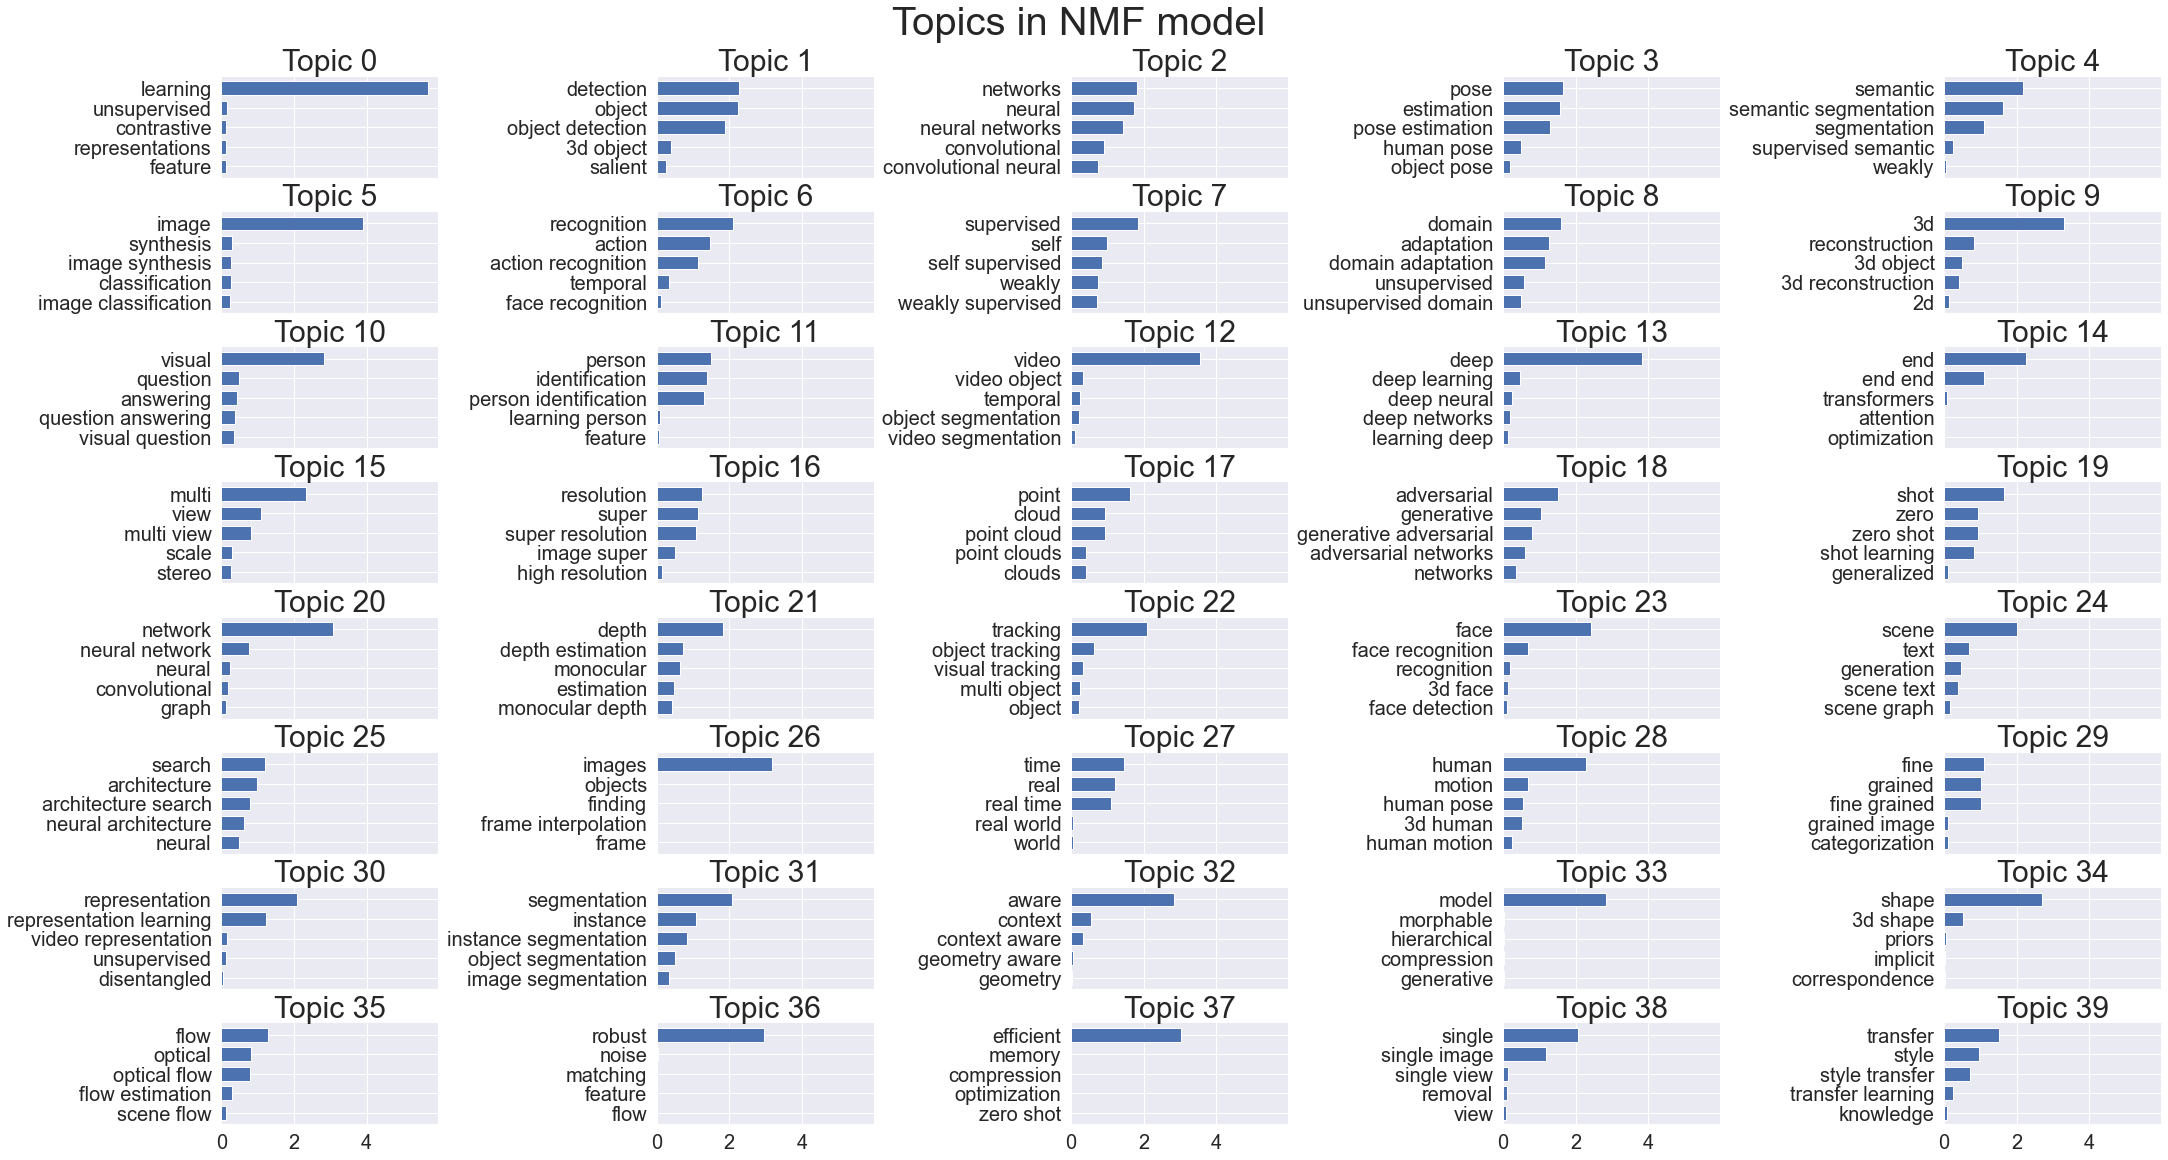

<Figure size 432x288 with 0 Axes>

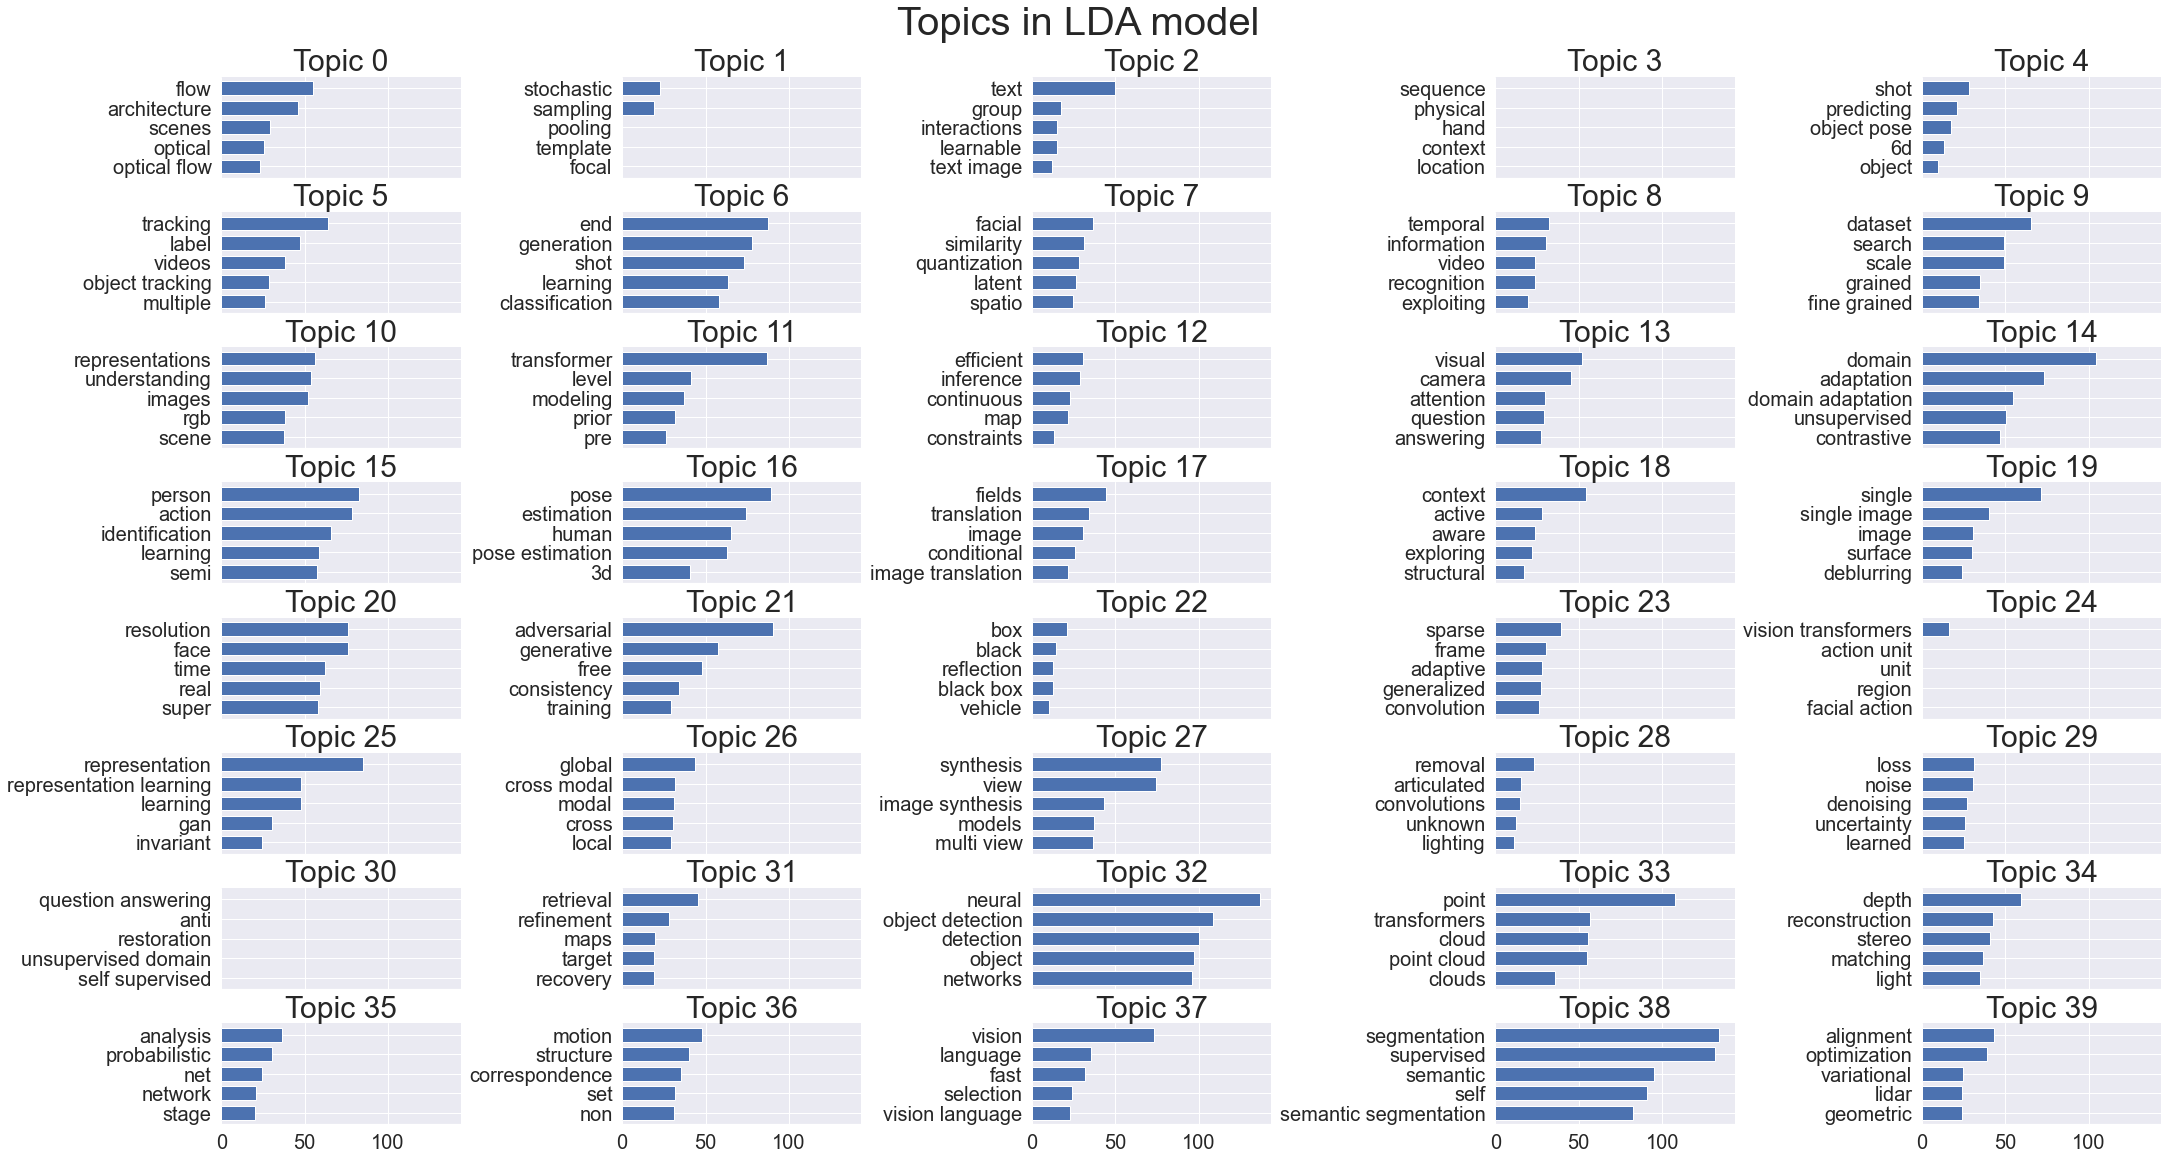

<Figure size 432x288 with 0 Axes>

In [6]:

n_components = 40 # total number of topics
n_top_words = 5 # number of words to plot
figsize=(30,16) # figure size


nmf = NMF(
    n_components=n_components,
    random_state=1,
    init="nndsvda",
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
    max_iter=400
).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
fig1 = utils.plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model ",
    figsize=figsize
)


lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tfidf)

fig2 = utils.plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words, "Topics in LDA model ",
    figsize=figsize
    )

Save NMF topic modelling results for further processing and EDA and pickle the NMF model as well as the vectorizer

In [7]:
topic_vector = nmf.transform(tfidf)
df["topic_class"] =  np.argmax(topic_vector, axis=1) # just keep the topic class
df.to_csv("cvpr_data_with_topics.csv", index=False)
df.head(1)

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite,topic_class
0,Deformable Spatial Pyramid Matching for Fast D...,"Jaechul Kim, Ce Liu, Fei Sha, Kristen Grauman",We introduce a fast deformable spatial pyramid...,content_cvpr_2013/papers/Kim_Deformable_Spatia...,2013,120,10.1109/cvpr.2013.299,10.1007/978-3-030-01249-6_36; 10.2493/jjspe.84...,deformable spatial pyramid matching for fast d...,0


In [8]:
df.groupby("topic_class").count()

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite
topic_class,,,,,,,,,
0,1214,1214,1214,1214,1214,1214,1214,764,941
1,465,465,465,465,465,465,465,299,354
2,382,382,382,382,382,382,382,276,321
3,312,312,312,312,312,312,312,225,260
4,242,242,242,242,242,242,242,146,173
5,438,438,438,438,438,438,438,289,343
6,294,294,294,294,294,294,294,211,248
7,379,379,379,379,379,379,379,189,259
8,227,227,227,227,227,227,227,125,177


In [9]:
import pickle
import os

try:
    os.mkdir("model")
except:
    print("Folder already exists, overwriting contents ...")

with open("model\\nmf.pickle", "wb") as f:
    pickle.dump(nmf, f)

with open("model\\tfidf_vectorizer.pickle", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("model\\topic_vector.pickle", "wb") as f:
    pickle.dump(topic_vector, f)

print("Data saved.")

Data saved.
